In [1]:
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
#import celltypist
#import scvi
#import scvelo as scv
#from celltypist import models
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import rc_context

sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=False, frameon=False)
sc.settings.verbosity = 1
sc.logging.print_header()

%config InlineBackend.figure_format = 'retina'

# matplot 输出的图片为illustrator可编辑的字体
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.0 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 louvain==0.8.0 pynndescent==0.5.7


# Tabula Sapiens 

In [2]:
adata_TS_Muscle = sc.read('./TAPE/TS_Muscle.h5ad')   
adata_TS_Muscle

AnnData object with n_obs × n_vars = 30746 × 58870
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'organ_tissue_colors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [5]:
adata_TS_Muscle.obs.free_annotation

cell_id
TSP4_Muscle_diaphragm_SS2_B112813_B134043_Empty_J24_L003                      endothelial cell of vascular tree
TSP4_Muscle_diaphragm_SS2_B112813_B134043_Endothelial_B12_L003                endothelial cell of vascular tree
TSP4_Muscle_diaphragm_SS2_B112813_B134043_Endothelial_B13_L003                       capillary endothelial cell
TSP4_Muscle_diaphragm_SS2_B112813_B134043_Endothelial_B14_L003             endothelial cell of lymphatic vessel
TSP4_Muscle_diaphragm_SS2_B112813_B134043_Endothelial_B15_L003             endothelial cell of lymphatic vessel
                                                                                           ...                 
TSP2_Muscle_rectusabdominus_SS2_B114661_B133087_MuscleStemCell_O6_S342                    mesenchymal stem cell
TSP2_Muscle_rectusabdominus_SS2_B114661_B133087_MuscleStemCell_P18_S378                   mesenchymal stem cell
TSP2_Muscle_rectusabdominus_SS2_B114661_B133087_MuscleStemCell_P21_S381     skeletal muscle sate

In [18]:
adata_TS_Muscle = adata_TS_Muscle.raw.to_adata()

In [19]:
adata_TS_Muscle.to_df()


,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4G4P,OR4G11P,OR4F5,AL627309.1,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
cell_id,,,,,,,,,,,,,,,,,,,,,
TSP4_Muscle_diaphragm_SS2_B112813_B134043_Empty_J24_L003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,640.0,0.0,0.0,0.0,161.0,12.0,1.0,1168.0,0.0,0.0
TSP4_Muscle_diaphragm_SS2_B112813_B134043_Endothelial_B12_L003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10752.0,0.0,0.0,0.0,7862.0,629.0,12.0,20735.0,0.0,1.0
TSP4_Muscle_diaphragm_SS2_B112813_B134043_Endothelial_B13_L003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9891.0,0.0,0.0,0.0,930.0,524.0,0.0,9131.0,0.0,0.0
TSP4_Muscle_diaphragm_SS2_B112813_B134043_Endothelial_B14_L003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,541.0,0.0,0.0,0.0,975.0,18.0,1.0,1029.0,0.0,0.0
TSP4_Muscle_diaphragm_SS2_B112813_B134043_Endothelial_B15_L003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12581.0,0.0,0.0,0.0,5202.0,1194.0,23.0,21675.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Muscle_rectusabdominus_SS2_B114661_B133087_MuscleStemCell_O6_S342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,567.0,0.0,0.0,0.0,535.0,694.0,0.0,4401.0,0.0,0.0
TSP2_Muscle_rectusabdominus_SS2_B114661_B133087_MuscleStemCell_P18_S378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1717.0,0.0,0.0,0.0,2699.0,491.0,0.0,11259.0,0.0,0.0
TSP2_Muscle_rectusabdominus_SS2_B114661_B133087_MuscleStemCell_P21_S381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.0,0.0,0.0,0.0,23.0,26.0,0.0,901.0,0.0,121.0


In [20]:
TS_Muscle_ref = pd.concat([ adata_TS_Muscle.obs.free_annotation.reset_index(drop=True), adata_TS_Muscle.to_df().reset_index(drop=True) ], axis=1)
TS_Muscle_ref

,free_annotation,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4G4P,OR4G11P,OR4F5,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
0,endothelial cell of vascular tree,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,640.0,0.0,0.0,0.0,161.0,12.0,1.0,1168.0,0.0,0.0
1,endothelial cell of vascular tree,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10752.0,0.0,0.0,0.0,7862.0,629.0,12.0,20735.0,0.0,1.0
2,capillary endothelial cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9891.0,0.0,0.0,0.0,930.0,524.0,0.0,9131.0,0.0,0.0
3,endothelial cell of lymphatic vessel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,541.0,0.0,0.0,0.0,975.0,18.0,1.0,1029.0,0.0,0.0
4,endothelial cell of lymphatic vessel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12581.0,0.0,0.0,0.0,5202.0,1194.0,23.0,21675.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30741,mesenchymal stem cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,567.0,0.0,0.0,0.0,535.0,694.0,0.0,4401.0,0.0,0.0
30742,mesenchymal stem cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1717.0,0.0,0.0,0.0,2699.0,491.0,0.0,11259.0,0.0,0.0
30743,skeletal muscle satellite stem cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.0,0.0,0.0,0.0,23.0,26.0,0.0,901.0,0.0,121.0
30744,skeletal muscle satellite stem cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,984.0,0.0,0.0,0.0,0.0,53.0,0.0,1792.0,0.0,0.0


In [28]:
TS_Muscle_ref.to_csv('./TAPE/TS_Muscle_ref.txt', index=None, sep='\t')

In [25]:
All_muslce_test = pd.read_csv('All_muscle_H_combat.csv')
All_muslce_test

,Unnamed: 0,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,C1orf159,...,FTCD,SPATC1L,LSS,MCM3AP,YBEY,C21orf58,PCNT,DIP2A,S100B,PRMT2
0,CDM-01,58,3325,328,1,1544,406,1098,1161,385,...,39,124,1973,4387,289,226,26224,2469,41,2577
1,CDM-02,171,3314,219,22,2507,561,358,2455,365,...,33,220,2329,4781,280,306,17413,2684,204,2974
2,CDM-03,51,2984,227,15,10443,375,774,1552,329,...,12,119,1599,4057,284,166,21393,2138,14,1640
3,CDM-04,89,3021,312,34,5788,263,430,1167,266,...,23,109,1834,4235,317,106,19366,2095,200,1880
4,CDM-05,40,3023,156,172,10671,269,179,825,303,...,10,106,2200,3750,163,76,32947,1852,169,1141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,9_FM3814,102,1260,90,8,631,56,82,364,72,...,9,104,999,1662,98,45,6741,729,49,632
1217,9_FM3835,168,3002,218,21,4351,136,137,804,285,...,49,117,2404,4050,272,159,17041,2441,133,1912
1218,9_HL_VL_AMP08,102,3633,225,4,6337,81,63,343,191,...,25,106,2245,5135,157,105,48042,2657,5,599
1219,9_JE_VL_AMP05,99,5364,312,49,4869,239,115,785,196,...,38,154,2371,5777,318,120,28364,1645,18,917


In [26]:
All_muslce_test.columns

Index(['Unnamed: 0', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1', 'HES4',
       'ISG15', 'AGRN', 'C1orf159',
       ...
       'FTCD', 'SPATC1L', 'LSS', 'MCM3AP', 'YBEY', 'C21orf58', 'PCNT', 'DIP2A',
       'S100B', 'PRMT2'],
      dtype='object', length=16954)

In [27]:
All_muslce_test.columns.intersection(TS_Muscle_ref.columns)

Index(['SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1', 'HES4', 'ISG15',
       'AGRN', 'C1orf159', 'TTLL10',
       ...
       'FTCD', 'SPATC1L', 'LSS', 'MCM3AP', 'YBEY', 'C21orf58', 'PCNT', 'DIP2A',
       'S100B', 'PRMT2'],
      dtype='object', length=16510)

# GSE143704 (Micheli et al, 2020)

In [2]:
Micheli_meta = pd.read_csv("TAPE/GSE143704_DeMicheli_HumanMuscleAtlas_metadata.txt", delimiter = '	').rename(columns={'Unnamed: 0': 'Sample_id'})[['Sample_id', 'cell_annotation']]
Micheli_meta

FileNotFoundError: [Errno 2] No such file or directory: 'TAPE/GSE143704_DeMicheli_HumanMuscleAtlas_metadata.txt'

In [13]:
Micheli_meta['cell_annotation.1'].unique()

array(['ICAM1+ SELE+ VCAM1+ Endothelial', 'CLDN5+ PECAM1+ Endothelial',
       'RGS5+ MYL9+ Pericytes', 'APOD+ CFD+ PLAC9+ Adipocytes',
       'PAX7low MYF5+ MuSCs and progenitors',
       'ACTA2+ MYH11+ MYL9+ Smooth muscle cells',
       'C1QA+ CD74+ Macrophages', 'IL7R+ PTPRC+ NKG7+ B/T/NK cells',
       'COL1A1+ Fibroblasts', 'ACTA1+ Mature skeletal muscle',
       'CD36+ VWF+ Platelets', 'FBN1+ MFAP5+ CD55+ Fibroblasts',
       'DCN+ GSN+ MYOC+ Fibroblasts',
       'S100A9+ LYZ+ Inflammatory macrophages',
       'PAX7+ DLK1+ MuSCs and progenitors', 'HBA1+ Erythroblasts'],
      dtype=object)

In [12]:
Micheli_meta.cell_annotation.unique()

array(['ICAM1+ SELE+ VCAM1+ Endothelial', 'CLDN5+ PECAM1+ Endothelial',
       'RGS5+ MYL9+ Pericytes', 'APOD+ CFD+ PLAC9+ Adipocytes',
       'PAX7low MYF5+ MuSCs and progenitors',
       'ACTA2+ MYH11+ MYL9+ Smooth muscle cells',
       'C1QA+ CD74+ Macrophages', 'IL7R+ PTPRC+ NKG7+ B/T/NK cells',
       'COL1A1+ Fibroblasts', 'ACTA1+ Mature skeletal muscle',
       'CD36+ VWF+ Platelets', 'FBN1+ MFAP5+ CD55+ Fibroblasts',
       'DCN+ GSN+ MYOC+ Fibroblasts',
       'S100A9+ LYZ+ Inflammatory macrophages',
       'PAX7+ DLK1+ MuSCs and progenitors', 'HBA1+ Erythroblasts'],
      dtype=object)

In [34]:
Micheli = pd.read_csv("TAPE/test.txt", delimiter = '	').rename(columns={'Unnamed: 0': 'Sample_id'})#.set_index('Sample_id')
#Micheli.index.names = ['Sample_id']
Micheli.set_index('Sample_id').T

Sample_id,RP11-34P13.7,FO538757.2,AP006222.2,RP4-669L17.10,RP11-206L10.9
hu_092618_AAACCTGAGGGAACGG,0,0,0,0,0
hu_092618_AAACCTGAGGGCTTCC,0,0,0,0,0
hu_092618_AAACCTGCAAACTGTC,0,0,0,0,0
hu_092618_AAACCTGCAATGCCAT,0,0,0,0,0
hu_092618_AAACCTGCATAGGATA,0,0,0,0,0
...,...,...,...,...,...
hu_080619_TTTGACTAGCTAGAAT,0,0,0,0,0
hu_080619_TTTGATCCAGGTCCCA,0,0,2,0,0
hu_080619_TTTGATCTCGCCGATG,0,0,0,0,0
hu_080619_TTTGTTGTCCCATGGG,0,1,0,0,0


In [35]:
Micheli = pd.read_csv("TAPE/GSE143704_DeMicheli_HumanMuscleAtlas_rawdata.txt", delimiter = '	').rename(columns={'Unnamed: 0': 'Sample_id'})
Micheli = Micheli.set_index('Sample_id').T
Micheli

Sample_id,RP11-34P13.7,FO538757.2,AP006222.2,RP4-669L17.10,RP11-206L10.9,FAM87B,LINC00115,FAM41C,RP11-54O7.1,SAMD11,...,TSPO2,PAGE2B,HBG1,ABC7-42404400C24.1,IFIT1B,CTD-2026K11.2,HBQ1,CTA-363E6.6,BPIFB4,KLF1
hu_092618_AAACCTGAGGGAACGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hu_092618_AAACCTGAGGGCTTCC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hu_092618_AAACCTGCAAACTGTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hu_092618_AAACCTGCAATGCCAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hu_092618_AAACCTGCATAGGATA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hu_080619_TTTGACTAGCTAGAAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hu_080619_TTTGATCCAGGTCCCA,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hu_080619_TTTGATCTCGCCGATG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hu_080619_TTTGTTGTCCCATGGG,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
Micheli.reset_index(drop=True)

Sample_id,RP11-34P13.7,FO538757.2,AP006222.2,RP4-669L17.10,RP11-206L10.9,FAM87B,LINC00115,FAM41C,RP11-54O7.1,SAMD11,...,TSPO2,PAGE2B,HBG1,ABC7-42404400C24.1,IFIT1B,CTD-2026K11.2,HBQ1,CTA-363E6.6,BPIFB4,KLF1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22054,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22056,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [47]:
Micheli_ref = pd.concat([ Micheli_meta.cell_annotation.reset_index(drop=True), Micheli.reset_index(drop=True) ], axis=1)
Micheli_ref

,cell_annotation,RP11-34P13.7,FO538757.2,AP006222.2,RP4-669L17.10,RP11-206L10.9,FAM87B,LINC00115,FAM41C,RP11-54O7.1,...,TSPO2,PAGE2B,HBG1,ABC7-42404400C24.1,IFIT1B,CTD-2026K11.2,HBQ1,CTA-363E6.6,BPIFB4,KLF1
0,ICAM1+ SELE+ VCAM1+ Endothelial,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CLDN5+ PECAM1+ Endothelial,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CLDN5+ PECAM1+ Endothelial,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CLDN5+ PECAM1+ Endothelial,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CLDN5+ PECAM1+ Endothelial,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22053,ACTA2+ MYH11+ MYL9+ Smooth muscle cells,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22054,FBN1+ MFAP5+ CD55+ Fibroblasts,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22055,ACTA2+ MYH11+ MYL9+ Smooth muscle cells,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22056,COL1A1+ Fibroblasts,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
Micheli_ref.to_csv('./TAPE/Micheli_ref.txt', index=None, sep='\t')

# TAPE Micheli 2020 results

In [2]:
adata_adj = sc.read('Integration data/adata_all_muscle.h5ad') 
adata_adj

AnnData object with n_obs × n_vars = 1221 × 9231
    obs: 'Data_source', 'Geo_accession', 'Author_Date', 'PMID', 'Gsm_accession', 'Casual_gene', 'Phenotype_1', 'Phenotype_2', 'Biopsy', 'Tissue', 'Method', 'Platform', 'Sex', 'Age_range', 'Phenotype_3', 'Phenotype_4', 'Phenotype_5'
    uns: 'Data_source_colors', 'Geo_accession_colors', 'Method_colors', 'Phenotype_1_colors', 'Phenotype_2_colors', 'Phenotype_3_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'combatseq_tmm', 'edgeR', 'raw_count'
    obsp: 'connectivities', 'distances'

In [3]:
Micheli_Pred = pd.read_csv('TAPE/TAPE_Pred_9231_Micheli.csv')
Micheli_Pred

,Sample_id,ACTA1+ Mature skeletal muscle,ACTA2+ MYH11+ MYL9+ Smooth muscle cells,APOD+ CFD+ PLAC9+ Adipocytes,C1QA+ CD74+ Macrophages,CD36+ VWF+ Platelets,CLDN5+ PECAM1+ Endothelial,COL1A1+ Fibroblasts,DCN+ GSN+ MYOC+ Fibroblasts,FBN1+ MFAP5+ CD55+ Fibroblasts,HBA1+ Erythroblasts,ICAM1+ SELE+ VCAM1+ Endothelial,IL7R+ PTPRC+ NKG7+ B/T/NK cells,PAX7+ DLK1+ MuSCs and progenitors,PAX7low MYF5+ MuSCs and progenitors,RGS5+ MYL9+ Pericytes,S100A9+ LYZ+ Inflammatory macrophages
0,CDM-01,0.419502,0.058707,0.000000,0.000000,0.107974,0.000000,0.0,0.015341,0.181535,0.047269,0.017827,0.009156,0.093403,0.008435,0.040850,0.000000
1,CDM-02,0.380950,0.057284,0.000000,0.000000,0.112892,0.000000,0.0,0.014144,0.201246,0.039604,0.028267,0.005674,0.098172,0.012554,0.049212,0.000000
2,CDM-03,0.421599,0.056193,0.000000,0.002776,0.120185,0.009578,0.0,0.007837,0.172983,0.050701,0.023598,0.000000,0.072690,0.002852,0.059009,0.000000
3,CDM-04,0.449316,0.055719,0.017343,0.008165,0.113743,0.012499,0.0,0.018314,0.177776,0.058036,0.000000,0.000000,0.046364,0.006060,0.036663,0.000000
4,CDM-05,0.495817,0.078053,0.000000,0.000000,0.114471,0.031739,0.0,0.000230,0.122758,0.081602,0.000000,0.027504,0.019280,0.007801,0.013417,0.007328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,9_FM3814,0.506450,0.085219,0.006364,0.000000,0.105386,0.020761,0.0,0.005213,0.129291,0.079054,0.000000,0.022596,0.019486,0.017103,0.000000,0.003078
1217,9_FM3835,0.521081,0.097566,0.009478,0.000000,0.096064,0.015550,0.0,0.006758,0.107332,0.089219,0.000000,0.007757,0.041156,0.008040,0.000000,0.000000
1218,9_HL_VL_AMP08,0.525529,0.056638,0.000000,0.000000,0.100441,0.000000,0.0,0.000000,0.132595,0.085028,0.000000,0.011192,0.062393,0.006114,0.018519,0.001551
1219,9_JE_VL_AMP05,0.502777,0.083040,0.000000,0.000000,0.101357,0.011442,0.0,0.000000,0.113931,0.080721,0.008078,0.001288,0.047368,0.004868,0.045129,0.000000


In [4]:
Meta_all = adata_adj.obs
Meta_all.reset_index(inplace=True)
Meta_all = Meta_all.rename(columns = {'index':'Sample_id'})
Meta_all

,Sample_id,Data_source,Geo_accession,Author_Date,PMID,Gsm_accession,Casual_gene,Phenotype_1,Phenotype_2,Biopsy,Tissue,Method,Platform,Sex,Age_range,Phenotype_3,Phenotype_4,Phenotype_5
0,CDM-01,GEO,GSE201255,"Hale et al., 2022",PMID36222125,GSM6056698,DMPK,DM1,CDM,vastus lateralis,Skeletal Muscle,total RNA,NextSeq 550,M,0-9,Myopathy,CDM,Myopathy
1,CDM-02,GEO,GSE201255,"Hale et al., 2022",PMID36222125,GSM6056699,DMPK,DM1,CDM,vastus lateralis,Skeletal Muscle,total RNA,NextSeq 550,M,0-9,Myopathy,CDM,Myopathy
2,CDM-03,GEO,GSE201255,"Hale et al., 2022",PMID36222125,GSM6056700,DMPK,DM1,CDM,vastus lateralis,Skeletal Muscle,total RNA,NextSeq 550,M,0-9,Myopathy,CDM,Myopathy
3,CDM-04,GEO,GSE201255,"Hale et al., 2022",PMID36222125,GSM6056701,DMPK,DM1,CDM,vastus lateralis,Skeletal Muscle,total RNA,NextSeq 550,F,0-9,Myopathy,CDM,Myopathy
4,CDM-05,GEO,GSE201255,"Hale et al., 2022",PMID36222125,GSM6056702,DMPK,DM1,CDM,vastus lateralis,Skeletal Muscle,total RNA,NextSeq 550,F,0-9,Myopathy,CDM,Myopathy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,9_FM3814,Helsinki,Oxford9,"Helsinki, 2023",NaN,Oxford9,IBM,IBM,sIBM,NaN,Skeletal Muscle,mRNA,NovaSeq,M,50-59,Myopathy,IBM,Myopathy
1217,9_FM3835,Helsinki,Oxford9,"Helsinki, 2023",NaN,Oxford9,Unsolved,Myopathy,Myopathy (Unsolved),NaN,Skeletal Muscle,mRNA,NovaSeq,M,50-59,Myopathy,Myopathy (Unsolved),Myopathy
1218,9_HL_VL_AMP08,Helsinki,Oxford9,"Helsinki, 2023",NaN,Oxford9,Normal,Control,Control (Amputee),NaN,Skeletal Muscle,mRNA,NovaSeq,M,60-89,Control (amputee),Control (amputee),Control (amputee)
1219,9_JE_VL_AMP05,Helsinki,Oxford9,"Helsinki, 2023",NaN,Oxford9,Normal,Control,Control (Amputee),NaN,Skeletal Muscle,mRNA,NovaSeq,NaN,60-89,Control (amputee),Control (amputee),Control (amputee)


In [18]:
Micheli = pd.merge(Meta_all, Micheli_Pred, how='left', on='Sample_id')
#TAPE = TAPE[~((TAPE.Data_source == 'GEO') & (TAPE.Phenotype_1 == 'Control'))]
#TAPE = TAPE[TAPE.Geo_accession != 'GSE202745']
Micheli

,Sample_id,Data_source,Geo_accession,Author_Date,PMID,Gsm_accession,Casual_gene,Phenotype_1,Phenotype_2,Biopsy,...,COL1A1+ Fibroblasts,DCN+ GSN+ MYOC+ Fibroblasts,FBN1+ MFAP5+ CD55+ Fibroblasts,HBA1+ Erythroblasts,ICAM1+ SELE+ VCAM1+ Endothelial,IL7R+ PTPRC+ NKG7+ B/T/NK cells,PAX7+ DLK1+ MuSCs and progenitors,PAX7low MYF5+ MuSCs and progenitors,RGS5+ MYL9+ Pericytes,S100A9+ LYZ+ Inflammatory macrophages
0,CDM-01,GEO,GSE201255,"Hale et al., 2022",PMID36222125,GSM6056698,DMPK,DM1,CDM,vastus lateralis,...,0.0,0.015341,0.181535,0.047269,0.017827,0.009156,0.093403,0.008435,0.040850,0.000000
1,CDM-02,GEO,GSE201255,"Hale et al., 2022",PMID36222125,GSM6056699,DMPK,DM1,CDM,vastus lateralis,...,0.0,0.014144,0.201246,0.039604,0.028267,0.005674,0.098172,0.012554,0.049212,0.000000
2,CDM-03,GEO,GSE201255,"Hale et al., 2022",PMID36222125,GSM6056700,DMPK,DM1,CDM,vastus lateralis,...,0.0,0.007837,0.172983,0.050701,0.023598,0.000000,0.072690,0.002852,0.059009,0.000000
3,CDM-04,GEO,GSE201255,"Hale et al., 2022",PMID36222125,GSM6056701,DMPK,DM1,CDM,vastus lateralis,...,0.0,0.018314,0.177776,0.058036,0.000000,0.000000,0.046364,0.006060,0.036663,0.000000
4,CDM-05,GEO,GSE201255,"Hale et al., 2022",PMID36222125,GSM6056702,DMPK,DM1,CDM,vastus lateralis,...,0.0,0.000230,0.122758,0.081602,0.000000,0.027504,0.019280,0.007801,0.013417,0.007328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,9_FM3814,Helsinki,Oxford9,"Helsinki, 2023",NaN,Oxford9,IBM,IBM,sIBM,NaN,...,0.0,0.005213,0.129291,0.079054,0.000000,0.022596,0.019486,0.017103,0.000000,0.003078
1217,9_FM3835,Helsinki,Oxford9,"Helsinki, 2023",NaN,Oxford9,Unsolved,Myopathy,Myopathy (Unsolved),NaN,...,0.0,0.006758,0.107332,0.089219,0.000000,0.007757,0.041156,0.008040,0.000000,0.000000
1218,9_HL_VL_AMP08,Helsinki,Oxford9,"Helsinki, 2023",NaN,Oxford9,Normal,Control,Control (Amputee),NaN,...,0.0,0.000000,0.132595,0.085028,0.000000,0.011192,0.062393,0.006114,0.018519,0.001551
1219,9_JE_VL_AMP05,Helsinki,Oxford9,"Helsinki, 2023",NaN,Oxford9,Normal,Control,Control (Amputee),NaN,...,0.0,0.000000,0.113931,0.080721,0.008078,0.001288,0.047368,0.004868,0.045129,0.000000


In [19]:
Micheli = Micheli[Micheli.Phenotype_3.isin(['Control (accident death)', 'Control (intermediate death)', 'Control (slow death)', 'Control (unexpected death)', 'Control (ventilator case)', 'Myopathy'])]
Micheli

category_order_list= ['Control (accident death)', 'Control (unexpected death)', 'Control (intermediate death)', 'Control (ventilator case)', 'Control (slow death)', 'Myopathy']
Micheli.Phenotype_3 = Micheli.Phenotype_3.cat.set_categories(category_order_list, ordered=True)


#cell_list = ['t cell', 'mature nk t cell', "cd4-positive, alpha-beta t cell", 'cd8-positive, alpha-beta t cell', 'fast muscle cell', 'slow muscle cell','skeletal muscle satellite stem cell', 'mesenchymal stem cell']


cell_list = Micheli_Pred.columns[1:].tolist()
Micheli = Micheli[['Phenotype_3'] + cell_list]

Micheli_melted = pd.melt(Micheli, id_vars=['Phenotype_3'], value_vars=cell_list , var_name="Attribute", value_name="Value")
#Micheli_melted#.to_csv('TAPE/TAPE_6_melted.csv', index = None)
Micheli_melted

C:\Users\Hua\AppData\Local\Temp\ipykernel_17276\2081546143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Micheli.Phenotype_3 = Micheli.Phenotype_3.cat.set_categories(category_order_list, ordered=True)


,Phenotype_3,Attribute,Value
0,Myopathy,ACTA1+ Mature skeletal muscle,0.419502
1,Myopathy,ACTA1+ Mature skeletal muscle,0.380950
2,Myopathy,ACTA1+ Mature skeletal muscle,0.421599
3,Myopathy,ACTA1+ Mature skeletal muscle,0.449316
4,Myopathy,ACTA1+ Mature skeletal muscle,0.495817
...,...,...,...
17323,Myopathy,S100A9+ LYZ+ Inflammatory macrophages,0.011504
17324,Myopathy,S100A9+ LYZ+ Inflammatory macrophages,0.000000
17325,Myopathy,S100A9+ LYZ+ Inflammatory macrophages,0.000000
17326,Myopathy,S100A9+ LYZ+ Inflammatory macrophages,0.003078


# Propotional results

In [23]:
Micheli_results = Micheli_melted.groupby(['Phenotype_3', 'Attribute']).agg(['mean', 'count', 'std'])
#Micheli_results.to_excel('TAPE/Micheli_results.xlsx')
Micheli_results

Value  \
                                                                      mean   
Phenotype_3              Attribute                                           
Control (accident death) ACTA1+ Mature skeletal muscle            0.481307   
                         ACTA2+ MYH11+ MYL9+ Smooth muscle cells  0.069318   
                         APOD+ CFD+ PLAC9+ Adipocytes             0.000967   
                         C1QA+ CD74+ Macrophages                  0.000302   
                         CD36+ VWF+ Platelets                     0.107402   
...                                                                    ...   
Myopathy                 IL7R+ PTPRC+ NKG7+ B/T/NK cells          0.003901   
                         PAX7+ DLK1+ MuSCs and progenitors        0.048539   
                         PAX7low MYF5+ MuSCs and progenitors      0.003915   
                         RGS5+ MYL9+ Pericytes                    0.031839   
                         S100A9+ LYZ+ Inflammatory macrophages    0.001960   

                                                                        \
                                                                 count   
Phenotype_3              Attribute                                       
Control (accident death) ACTA1+ Mature skeletal muscle              31   
                         ACTA2+ MYH11+ MYL9+ Smooth muscle cells    31   
                         APOD+ CFD+ PLAC9+ Adipocytes               31   
                         C1QA+ CD74+ Macrophages                    31   
                         CD36+ VWF+ Platelets                       31   
...                                                                ...   
Myopathy                 IL7R+ PTPRC+ NKG7+ B/T/NK cells           292   
                         PAX7+ DLK1+ MuSCs and progenitors         292   
                         PAX7low MYF5+ MuSCs and progenitors       292   
                         RGS5+ MYL9+ Pericytes                     292   
                         S100A9+ LYZ+ Inflammatory macrophages     292   

                                                                            
                                                                       std  
Phenotype_3              Attribute                                          
Control (accident death) ACTA1+ Mature skeletal muscle            0.022547  
                         ACTA2+ MYH11+ MYL9+ Smooth muscle cells  0.010694  
                         APOD+ CFD+ PLAC9+ Adipocytes             0.003543  
                         C1QA+ CD74+ Macrophages                  0.000905  
                         CD36+ VWF+ Platelets                     0.005623  
...                                                                    ...  
Myopathy                 IL7R+ PTPRC+ NKG7+ B/T/NK cells          0.010364  
                         PAX7+ DLK1+ MuSCs and progenitors        0.017894  
                         PAX7low MYF5+ MuSCs and progenitors      0.005022  
                         RGS5+ MYL9+ Pericytes                    0.021444  
                         S100A9+ LYZ+ Inflammatory macrophages    0.004960  

[96 rows x 3 columns]

In [33]:
import scipy.stats as stats

#Calculate mean and 95% CI for each cell type
Micheli_results = Micheli_melted.groupby(['Phenotype_3', 'Attribute']).agg(['mean', 'count', 'std'])
confidence_interval = stats.norm.interval(0.95, loc=Micheli_results[('value', 'mean')], scale=Micheli_results[('value', 'std')]/np.sqrt(Micheli_results[('value', 'count')]))

Micheli_results

KeyError: ('value', 'mean')

# Propotional plot

In [7]:

# select those pheotype samples > 30
TAPE_6 = TAPE[TAPE.Phenotype_3.isin(['Control (accident death)', 'Control (intermediate death)', 'Control (slow death)', 'Control (unexpected death)', 'Control (ventilator case)', 'Myopathy'])]
TAPE_6

,Sample_id,Data_source,Geo_accession,Author_Date,PMID,Gsm_accession,Casual_gene,Phenotype_1,Phenotype_2,Biopsy,...,COL1A1+ Fibroblasts,DCN+ GSN+ MYOC+ Fibroblasts,FBN1+ MFAP5+ CD55+ Fibroblasts,HBA1+ Erythroblasts,ICAM1+ SELE+ VCAM1+ Endothelial,IL7R+ PTPRC+ NKG7+ B/T/NK cells,PAX7+ DLK1+ MuSCs and progenitors,PAX7low MYF5+ MuSCs and progenitors,RGS5+ MYL9+ Pericytes,S100A9+ LYZ+ Inflammatory macrophages
0,CDM-01,GEO,GSE201255,"Hale et al., 2022",PMID36222125,GSM6056698,DMPK,DM1,CDM,vastus lateralis,...,0.0,0.015341,0.181535,0.047269,0.017827,0.009156,0.093403,0.008435,0.040850,0.000000
1,CDM-02,GEO,GSE201255,"Hale et al., 2022",PMID36222125,GSM6056699,DMPK,DM1,CDM,vastus lateralis,...,0.0,0.014144,0.201246,0.039604,0.028267,0.005674,0.098172,0.012554,0.049212,0.000000
2,CDM-03,GEO,GSE201255,"Hale et al., 2022",PMID36222125,GSM6056700,DMPK,DM1,CDM,vastus lateralis,...,0.0,0.007837,0.172983,0.050701,0.023598,0.000000,0.072690,0.002852,0.059009,0.000000
3,CDM-04,GEO,GSE201255,"Hale et al., 2022",PMID36222125,GSM6056701,DMPK,DM1,CDM,vastus lateralis,...,0.0,0.018314,0.177776,0.058036,0.000000,0.000000,0.046364,0.006060,0.036663,0.000000
4,CDM-05,GEO,GSE201255,"Hale et al., 2022",PMID36222125,GSM6056702,DMPK,DM1,CDM,vastus lateralis,...,0.0,0.000230,0.122758,0.081602,0.000000,0.027504,0.019280,0.007801,0.013417,0.007328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,9_FM3796,Helsinki,Oxford9,"Helsinki, 2023",NaN,Oxford9,IBM,IBM,sIBM,NaN,...,0.0,0.034409,0.161221,0.064070,0.000000,0.020909,0.009156,0.000000,0.027126,0.011504
1214,9_FM3799,Helsinki,Oxford9,"Helsinki, 2023",NaN,Oxford9,Unsolved,Myopathy,Myopathy (Unsolved),NaN,...,0.0,0.000000,0.130210,0.084717,0.000000,0.000000,0.050866,0.000000,0.037062,0.000000
1215,9_FM3800,Helsinki,Oxford9,"Helsinki, 2023",NaN,Oxford9,Unsolved,Myopathy,Myopathy (Unsolved),NaN,...,0.0,0.000260,0.139451,0.077868,0.005585,0.000366,0.066657,0.000000,0.037568,0.000000
1216,9_FM3814,Helsinki,Oxford9,"Helsinki, 2023",NaN,Oxford9,IBM,IBM,sIBM,NaN,...,0.0,0.005213,0.129291,0.079054,0.000000,0.022596,0.019486,0.017103,0.000000,0.003078


In [30]:
category_order_list= ['Control (accident death)', 'Control (unexpected death)', 'Control (intermediate death)', 'Control (ventilator case)', 'Control (slow death)', 'Myopathy']
TAPE_6.Phenotype_3 = TAPE_6.Phenotype_3.cat.set_categories(category_order_list, ordered=True)


#cell_list = ['t cell', 'mature nk t cell', "cd4-positive, alpha-beta t cell", 'cd8-positive, alpha-beta t cell', 'fast muscle cell', 'slow muscle cell','skeletal muscle satellite stem cell', 'mesenchymal stem cell']


cell_list = All_muslce_TAPE.columns[1:].tolist()


df_melted = pd.melt(TAPE_6, id_vars=["Sample_id", 'Phenotype_3'], value_vars=cell_list , var_name="Attribute", value_name="Value")
df_melted#.to_csv('TAPE/TAPE_6_melted.csv', index = None)

C:\Users\Hua\AppData\Local\Temp\ipykernel_33284\335861637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TAPE_6.Phenotype_3 = TAPE_6.Phenotype_3.cat.set_categories(category_order_list, ordered=True)


,Sample_id,Phenotype_3,Attribute,Value
0,CDM-01,Myopathy,ACTA1+ Mature skeletal muscle,0.419502
1,CDM-02,Myopathy,ACTA1+ Mature skeletal muscle,0.380950
2,CDM-03,Myopathy,ACTA1+ Mature skeletal muscle,0.421599
3,CDM-04,Myopathy,ACTA1+ Mature skeletal muscle,0.449316
4,CDM-05,Myopathy,ACTA1+ Mature skeletal muscle,0.495817
...,...,...,...,...
17323,9_FM3796,Myopathy,S100A9+ LYZ+ Inflammatory macrophages,0.011504
17324,9_FM3799,Myopathy,S100A9+ LYZ+ Inflammatory macrophages,0.000000
17325,9_FM3800,Myopathy,S100A9+ LYZ+ Inflammatory macrophages,0.000000
17326,9_FM3814,Myopathy,S100A9+ LYZ+ Inflammatory macrophages,0.003078


In [8]:
df_melted.Phenotype_3.unique()

['Myopathy', 'Control (slow death)', 'Control (ventilator case)', 'Control (accident death)', 'Control (intermediate death)', 'Control (unexpected death)']
Categories (6, object): ['Control (accident death)' < 'Control (unexpected death)' < 'Control (intermediate death)' < 'Control (ventilator case)' < 'Control (slow death)' < 'Myopathy']

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
meta NOT subset; don't know how to subset; dropped


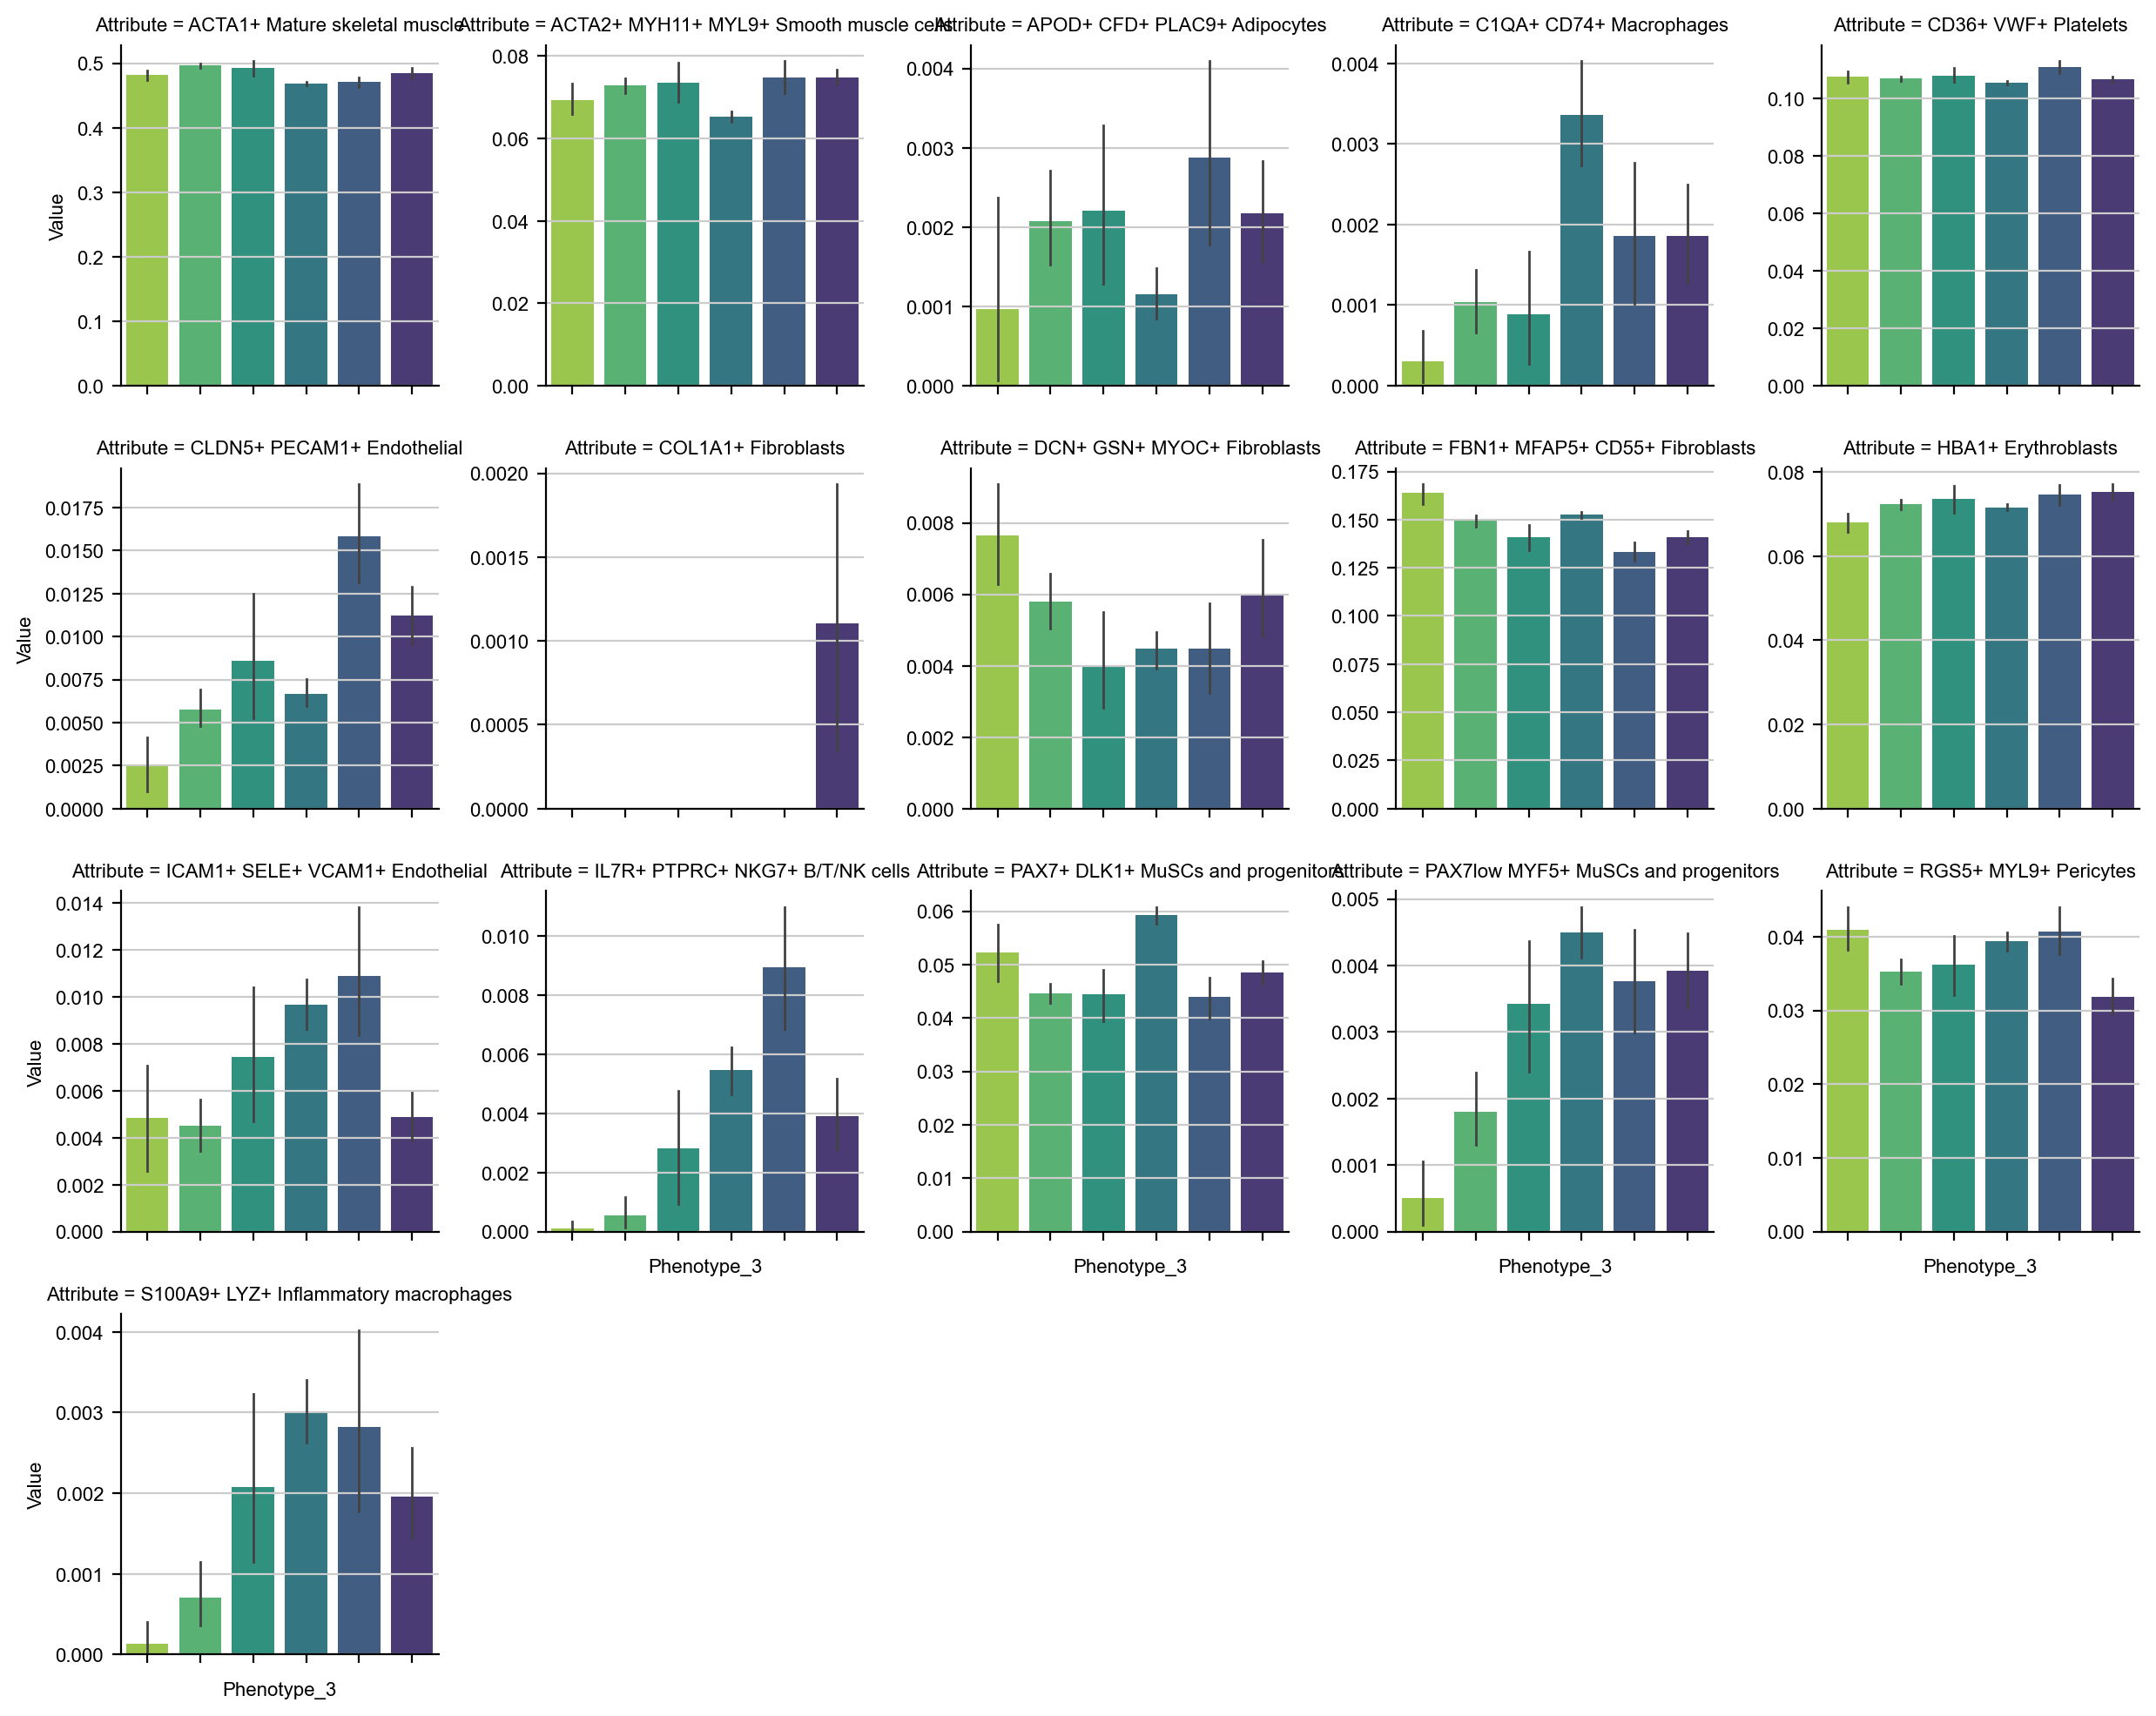

In [31]:
sc.set_figure_params(dpi=100, color_map = 'Set1', figsize= [4, 4], transparent=True, frameon=False, fontsize=8,) # fontsize=8, figsize= [8, 4]


g = sns.FacetGrid(df_melted, col="Attribute", height=2.5, col_wrap=5, sharey=False)
g.map(sns.barplot,'Phenotype_3', 'Value', palette = 'viridis_r', errorbar='ci',  errwidth=1)

g.set_xticklabels(rotation=90)

plt.savefig('df_melted.pdf')

In [ ]:
sc.set_figure_params(dpi=100, color_map = 'viridis', transparent=True, frameon=False, fontsize=10, figsize= [22, 4])

sns.barplot(data=TAPE, x='Phenotype_4', y='mature nk t cell', errorbar='ci', palette = 'viridis_r', errwidth=1).set(title='cd4-positive, alpha-beta t cell') #, hue='Phenotype_2', palette = customPalette
plt.xticks(rotation=90)
#plt.ylim(0, 0.003)

In [11]:
df_melted.Attribute.unique()

array(['capillary endothelial cell', 'cd4-positive, alpha-beta t cell',
       'cd8-positive, alpha-beta t cell', 'endothelial cell of artery',
       'endothelial cell of lymphatic vessel',
       'endothelial cell of vascular tree', 'erythrocyte',
       'fast muscle cell', 'macrophage', 'mast cell', 'mature nk t cell',
       'mesenchymal stem cell', 'mesothelial cell', 'pericyte cell',
       'skeletal muscle satellite stem cell', 'slow muscle cell',
       'smooth muscle cell', 't cell', 'tendon cell'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Actinin-2 myopathy'),
  Text(1, 0, 'BMD'),
  Text(2, 0, 'CDM'),
  Text(3, 0, 'Control (amputee)'),
  Text(4, 0, 'Control (fast death)'),
  Text(5, 0, 'Control (hyperkalemia)'),
  Text(6, 0, 'Control (intermediate death)'),
  Text(7, 0, 'Control (others)'),
  Text(8, 0, 'Control (slow death)'),
  Text(9, 0, 'Control (ventilator case)'),
  Text(10, 0, 'DM1'),
  Text(11, 0, 'DMD'),
  Text(12, 0, 'Distal ADB-filaminopathy'),
  Text(13, 0, 'FSHD'),
  Text(14, 0, 'IBM'),
  Text(15, 0, 'LGMD R12'),
  Text(16, 0, 'Myopathy (HNRNPA1)'),
  Text(17, 0, 'Myopathy (OBSCN)'),
  Text(18, 0, 'Myopathy (TNPO3)'),
  Text(19, 0, 'Myopathy (Unsolved)'),
  Text(20, 0, 'SMPX myopathy'),
  Text(21, 0, 'Titinopathy')])

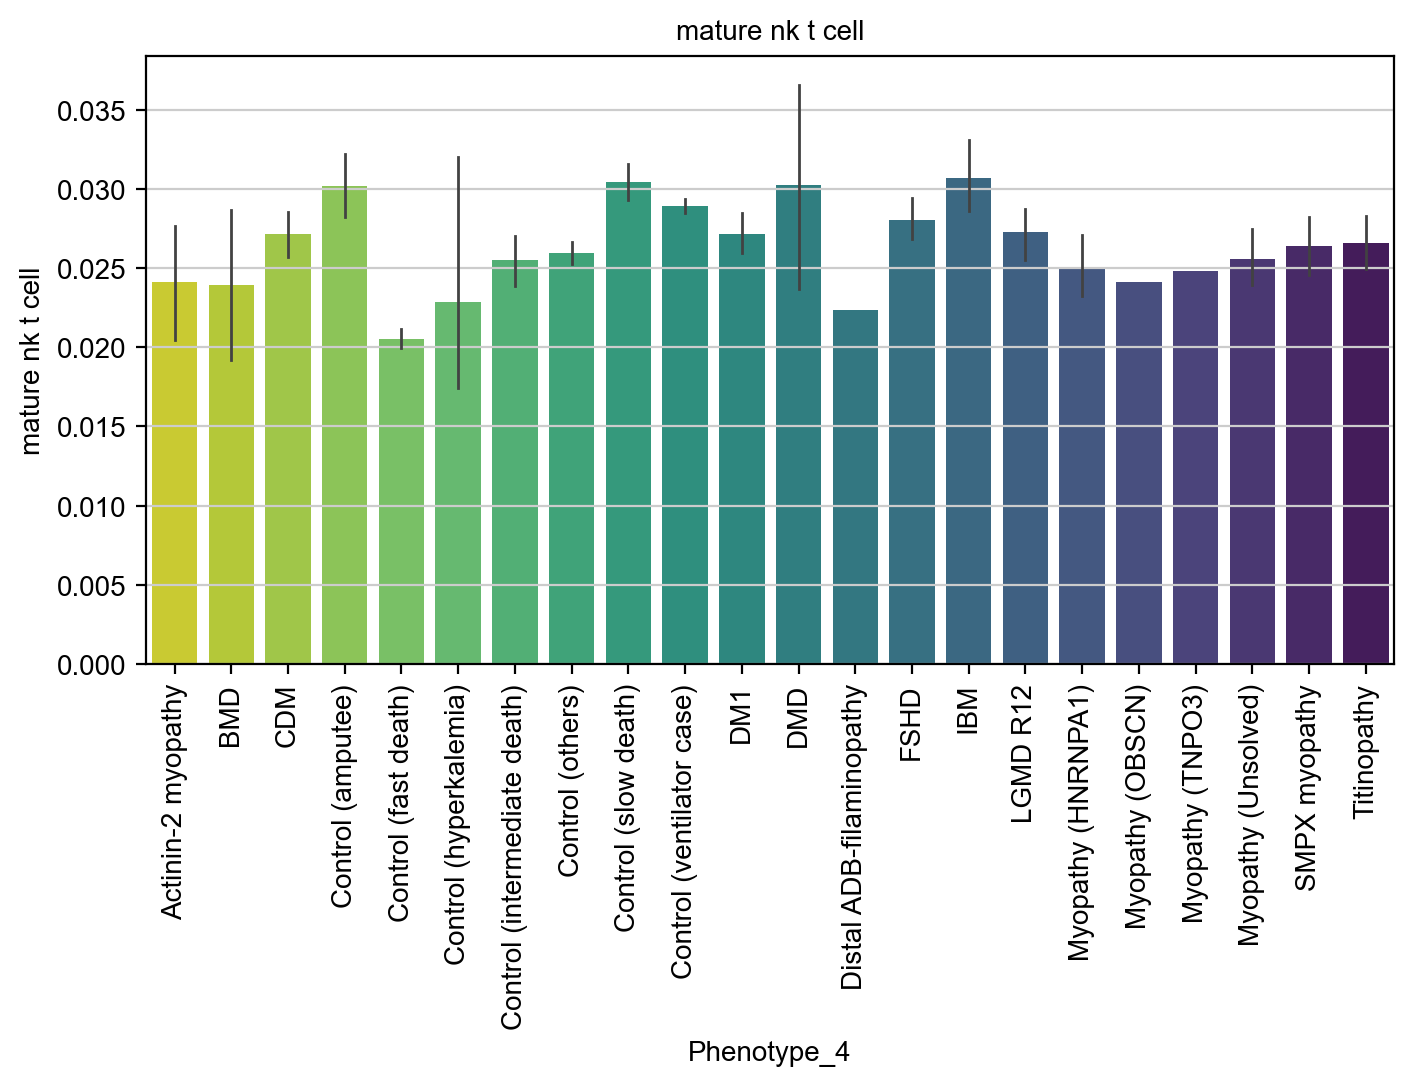

In [18]:
sc.set_figure_params(dpi=100, color_map = 'viridis', transparent=True, frameon=False, fontsize=10, figsize= [8, 4])

sns.barplot(data=TAPE, x='Phenotype_4', y='mature nk t cell', errorbar='ci', palette = 'viridis_r', errwidth=1).set(title='mature nk t cell') #, hue='Phenotype_2', palette = customPalette
plt.xticks(rotation=90)

In [6]:
df_melted.Attribute.unique()

NameError: name 'df_melted' is not defined

In [11]:
TAPE.columns

Index(['level_0', 'Sample_id', 'Data_source', 'Geo_accession', 'Author_Date',
       'PMID', 'Gsm_accession', 'Casual_gene', 'Phenotype_1', 'Phenotype_2',
       'Biopsy', 'Tissue', 'Method', 'Platform', 'Sex', 'Age_range',
       'Phenotype_3', 'Phenotype_4', 'capillary endothelial cell',
       'cd4-positive, alpha-beta t cell', 'cd8-positive, alpha-beta t cell',
       'endothelial cell of artery', 'endothelial cell of lymphatic vessel',
       'endothelial cell of vascular tree', 'erythrocyte', 'fast muscle cell',
       'macrophage', 'mast cell', 'mature nk t cell', 'mesenchymal stem cell',
       'mesothelial cell', 'pericyte cell',
       'skeletal muscle satellite stem cell', 'slow muscle cell',
       'smooth muscle cell', 't cell', 'tendon cell'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Actinin-2 myopathy'),
  Text(1, 0, 'BMD'),
  Text(2, 0, 'CDM'),
  Text(3, 0, 'Control (amputee)'),
  Text(4, 0, 'Control (fast death)'),
  Text(5, 0, 'Control (hyperkalemia)'),
  Text(6, 0, 'Control (intermediate death)'),
  Text(7, 0, 'Control (others)'),
  Text(8, 0, 'Control (slow death)'),
  Text(9, 0, 'DM1'),
  Text(10, 0, 'DMD'),
  Text(11, 0, 'Distal ADB-filaminopathy'),
  Text(12, 0, 'FSHD'),
  Text(13, 0, 'IBM'),
  Text(14, 0, 'LGMD R12'),
  Text(15, 0, 'Myopathy (HNRNPA1)'),
  Text(16, 0, 'Myopathy (OBSCN)'),
  Text(17, 0, 'Myopathy (TNPO3)'),
  Text(18, 0, 'Myopathy (Unsolved)'),
  Text(19, 0, 'SMPX myopathy'),
  Text(20, 0, 'Titinopathy')])

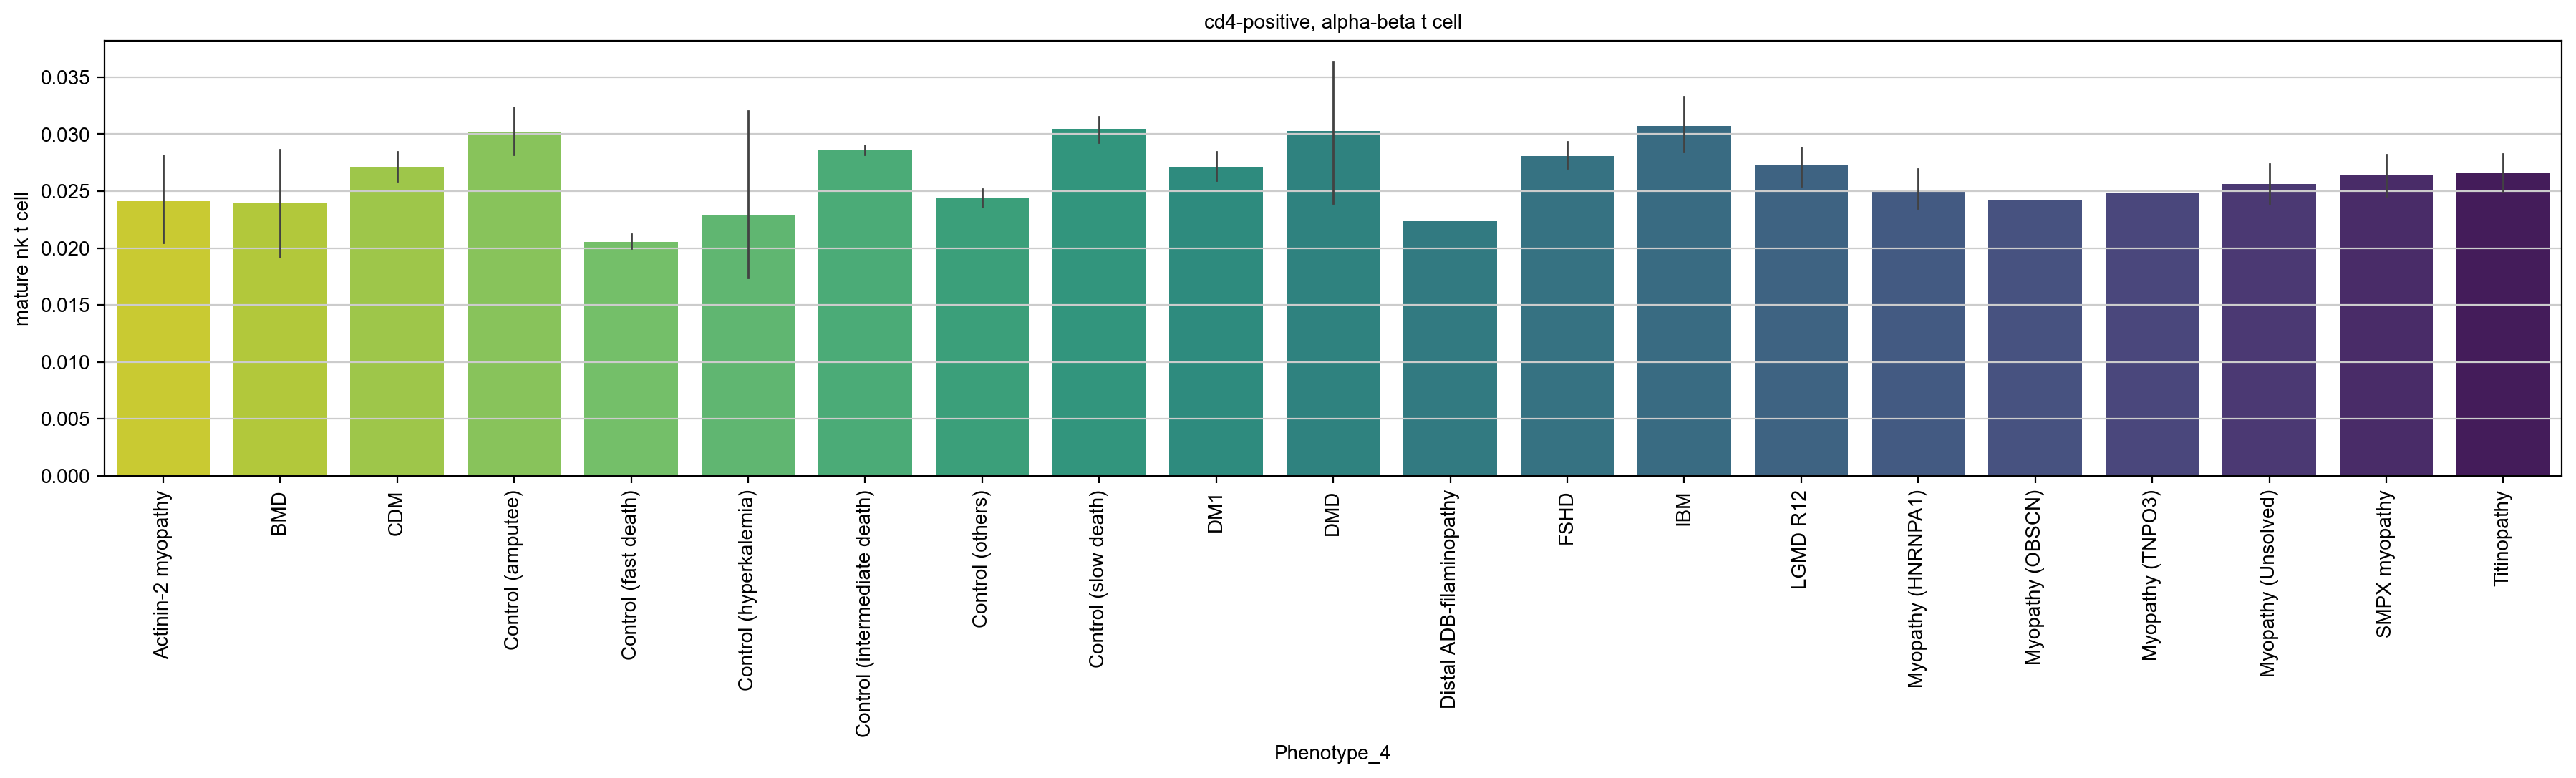

In [14]:
sc.set_figure_params(dpi=100, color_map = 'viridis', transparent=True, frameon=False, fontsize=10, figsize= [22, 4])

sns.barplot(data=TAPE, x='Phenotype_4', y='mature nk t cell', errorbar='ci', palette = 'viridis_r', errwidth=1).set(title='cd4-positive, alpha-beta t cell') #, hue='Phenotype_2', palette = customPalette
plt.xticks(rotation=90)
#plt.ylim(0, 0.003)

In [51]:
TAPE.groupby(['Phenotype_3']).mean().sort_values(by=['tendon cell'], ascending=False)

C:\Users\Hua\AppData\Local\Temp\ipykernel_17512\2427664240.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  TAPE.groupby(['Phenotype_3']).mean().sort_values(by=['tendon cell'], ascending=False)


,capillary endothelial cell,"cd4-positive, alpha-beta t cell","cd8-positive, alpha-beta t cell",endothelial cell of artery,endothelial cell of lymphatic vessel,endothelial cell of vascular tree,erythrocyte,fast muscle cell,macrophage,mast cell,mature nk t cell,mesenchymal stem cell,mesothelial cell,pericyte cell,skeletal muscle satellite stem cell,slow muscle cell,smooth muscle cell,t cell,tendon cell
Phenotype_3,,,,,,,,,,,,,,,,,,,
Control (accident death),0.067703,0.000000,0.054112,0.090564,0.000123,0.063876,0.017855,0.111834,0.014083,0.042160,0.000000,0.105220,0.001907,0.086387,0.104429,0.211922,0.023326,0.000029,0.004471
Control (unexpected death),0.066666,0.000000,0.054723,0.090809,0.000050,0.064604,0.018584,0.110090,0.018490,0.042702,0.000016,0.106825,0.001893,0.084556,0.104413,0.208258,0.022839,0.000237,0.004245
Control (hyperkalemia),0.068022,0.000000,0.049685,0.089055,0.000000,0.054493,0.026684,0.117762,0.010602,0.052441,0.000393,0.107280,0.000538,0.083320,0.105775,0.211593,0.016189,0.002269,0.003898
Myopathy,0.066799,0.000221,0.053715,0.089508,0.000076,0.059970,0.022747,0.105695,0.020589,0.051715,0.000459,0.108098,0.002093,0.080200,0.105612,0.206072,0.018798,0.003798,0.003832
Control (intermediate death),0.065684,0.000000,0.056454,0.091427,0.000127,0.067273,0.018627,0.104645,0.024915,0.043721,0.000021,0.106126,0.003191,0.082428,0.104291,0.205611,0.021676,0.000535,0.003249
Control (pediatric),0.070390,0.000420,0.053842,0.093223,0.000054,0.062345,0.023046,0.104078,0.022172,0.049071,0.000215,0.104719,0.001721,0.083186,0.102174,0.202420,0.021436,0.002823,0.002666
Control (slow death),0.066884,0.000000,0.060527,0.092400,0.000220,0.070234,0.018075,0.097421,0.028945,0.044306,0.000084,0.105656,0.003672,0.081007,0.103906,0.201708,0.021968,0.000511,0.002477
Control (ventilator case),0.066942,0.000006,0.058917,0.090734,0.000154,0.062501,0.019169,0.103506,0.027011,0.047380,0.000011,0.104704,0.001572,0.080982,0.105135,0.209499,0.019846,0.000418,0.001513
Control (others),0.068793,0.000169,0.052901,0.089186,0.000078,0.061422,0.022854,0.115781,0.015470,0.047902,0.000134,0.103309,0.001473,0.082650,0.105340,0.213818,0.016953,0.000332,0.001436


C:\Users\Hua\AppData\Local\Temp\ipykernel_6116\2156574159.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  TAPE.groupby(['Phenotype_2']).mean()['t cell'].sort_values(ascending=True).plot(kind='bar')


<AxesSubplot: xlabel='Phenotype_2'>

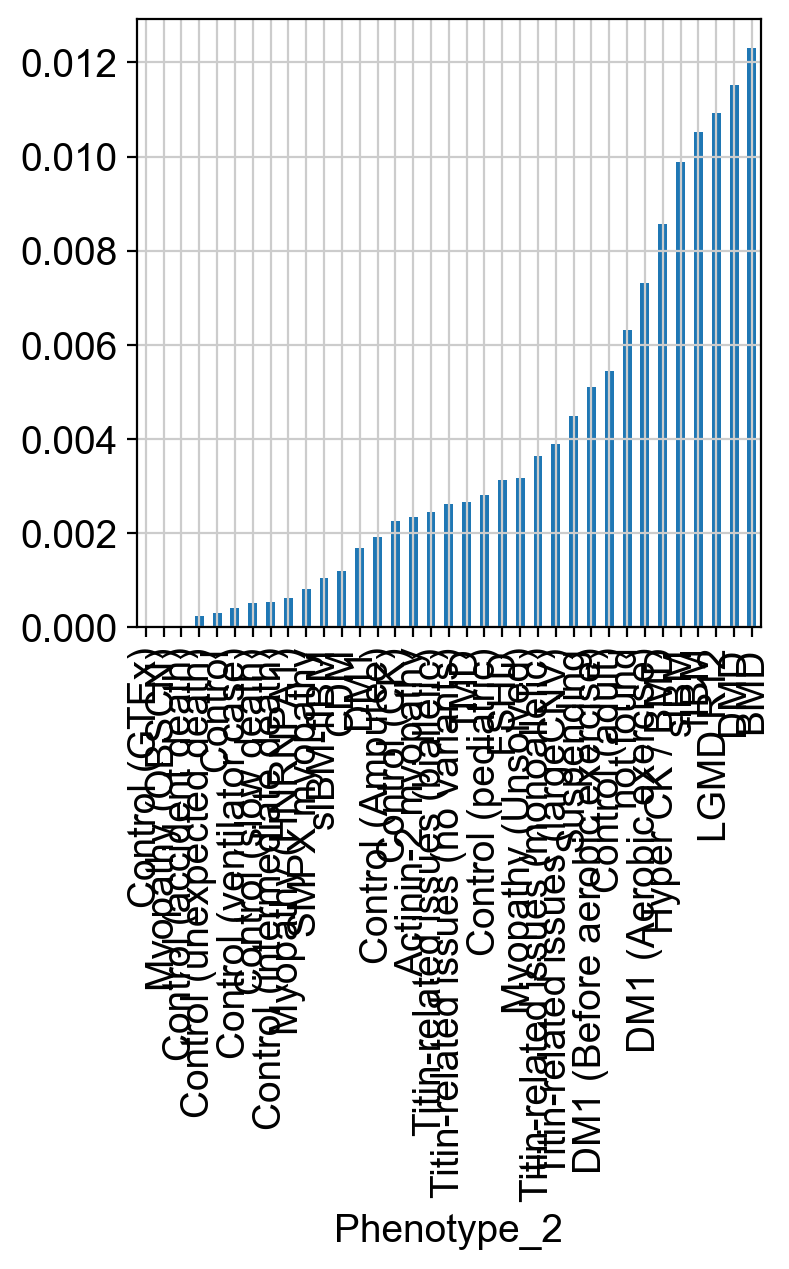

In [75]:
TAPE.groupby(['Phenotype_2']).mean()['t cell'].sort_values(ascending=True).plot(kind='bar')

In [46]:
TAPE_group = TAPE.groupby(['Phenotype_1']).mean().stack().reset_index().rename(columns = {'level_1':'Celltype', 0:'Mean'})
TAPE_group

C:\Users\Hua\AppData\Local\Temp\ipykernel_6116\1654533236.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  TAPE_group = TAPE.groupby(['Phenotype_1']).mean().stack().reset_index().rename(columns = {'level_1':'Celltype', 0:'Mean'})


,Phenotype_1,Celltype,Mean
0,Actinin-2 myopathy,capillary endothelial cell,0.066396
1,Actinin-2 myopathy,"cd4-positive, alpha-beta t cell",0.000000
2,Actinin-2 myopathy,"cd8-positive, alpha-beta t cell",0.050263
3,Actinin-2 myopathy,endothelial cell of artery,0.088433
4,Actinin-2 myopathy,endothelial cell of lymphatic vessel,0.000000
...,...,...,...
261,not found,skeletal muscle satellite stem cell,0.104656
262,not found,slow muscle cell,0.197930
263,not found,smooth muscle cell,0.024917
264,not found,t cell,0.006311


In [52]:
TAPE_group.to_csv('TAPE_group.csv', index = None)

C:\Users\Hua\AppData\Local\Temp\ipykernel_6116\2999589246.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  TAPE.groupby(['Phenotype_1']).mean().plot(kind='bar', stacked=True)


<AxesSubplot: xlabel='Phenotype_1'>

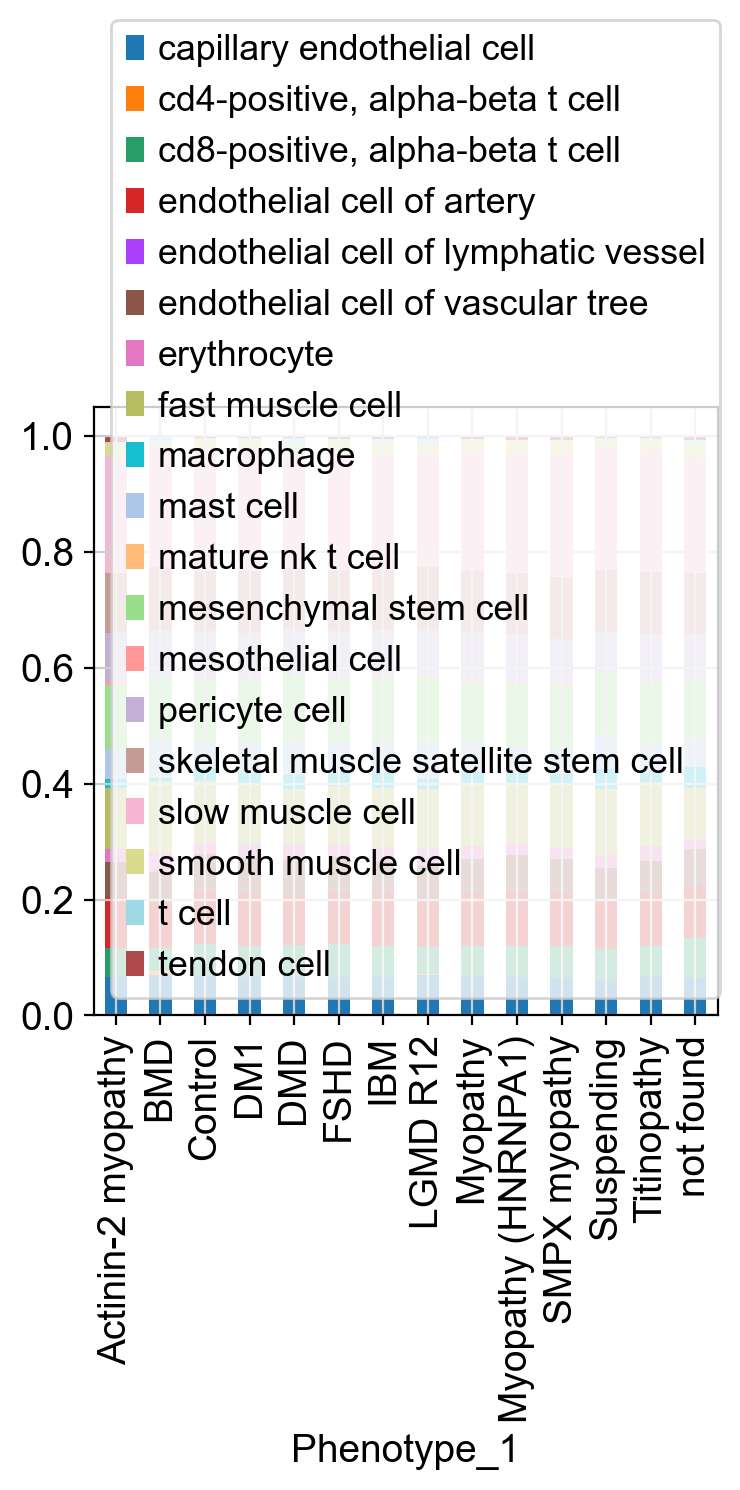

In [50]:
TAPE.groupby(['Phenotype_1']).mean().plot(kind='bar', stacked=True)

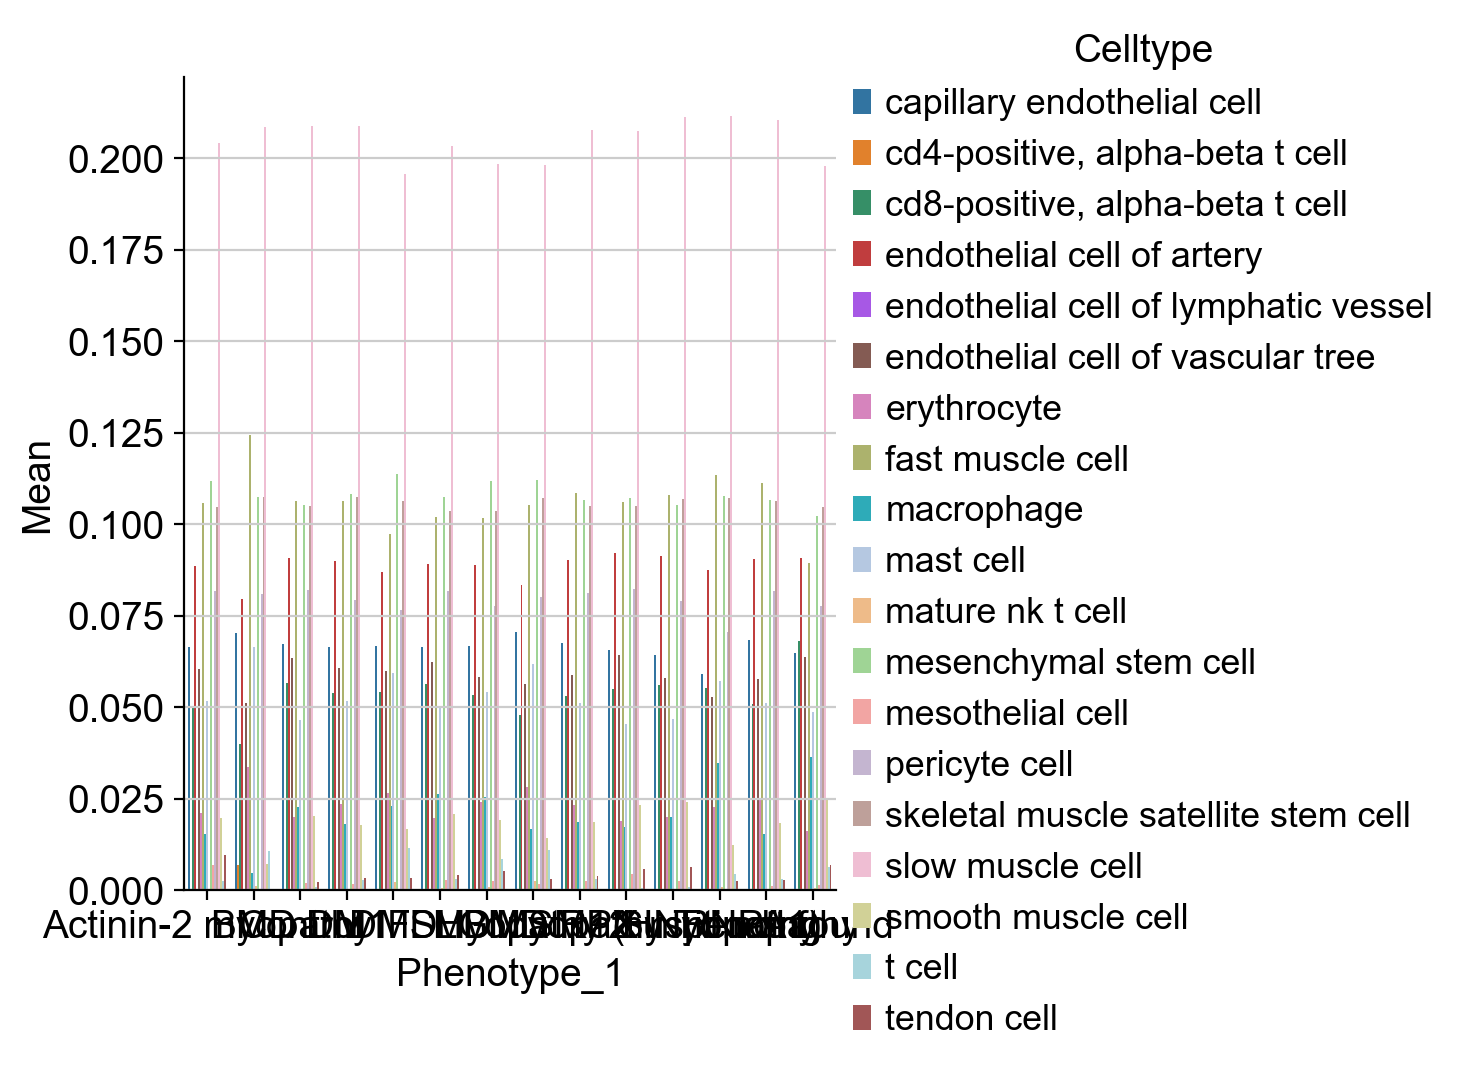

In [48]:
sns.catplot(x='Phenotype_1', y='Mean', hue='Celltype', kind='bar', data=TAPE_group)